In [339]:
# Import libraries and set options to display max cols and rows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 150)
pd.set_option("display.max_columns", 80)

In [305]:
# Read Fb LeaderBoard México DataFrame
# Read Annual Posts

original_pages_df = pd.read_csv("facebook_leaderboard_Mexico_North_Cone_News_&_Media_2018-09-05_12-04-19_-03-2019-09-05_12-04-19_-03.csv")
original_annual_df = pd.read_csv("annual_posts.csv")

In [306]:
# Create copies for the DataFrames

pages_df = original_pages_df.copy()
annual_df = original_annual_df.copy()

In [307]:
# Change column names to lower and with _

def columns_to_lower(df):
    col_names = list(df.columns)
    new_cols = [col.replace(" ", "_").lower() for col in col_names]
    df.columns = new_cols
    return df

pages_df = columns_to_lower(pages_df)

In [308]:
# Replace "," with "" to transform cols into integers

without_comma = ['total_interactions', 'likes', 'comments', 'shares', 
                 'owned_post_views', 'owned_views_from_shares','owned_total_views',
                 'views_on_shared_posts', 'views_while_live', '3-min+_videos', 'loves',
                 'wows', 'hahas', 'sads', 'angrys', 'total_posts', 'photo_posts',
                 'link_posts', 'owned_video_posts', 'page_likes', 'page_growth']
                
for col in without_comma:
    pages_df[col] = pages_df[col].str.replace(",", "")

In [309]:
# Delete all registries that don't have posts and transform to numeric all the columns specified

pages_df = pages_df[pages_df["total_posts"] != "No posts in this timeframe"]

convert_int = ['total_interactions', 'likes', 'comments',
               'shares', 'owned_post_views', 'owned_views_from_shares',
               'owned_total_views', 'views_on_shared_posts', 'views_while_live',
               '3-min+_videos', 'loves', 'wows', 'hahas', 'sads', 'angrys',
               'total_posts', 'photo_posts','link_posts', 'status_posts',
               'owned_video_posts', 'shared_video_posts', 'other_video_posts', 'page_likes', 'page_growth'
              ]

for col in convert_int:
    pages_df[col] = pd.to_numeric(pages_df[col], downcast = "integer")

# Replace all registries that have "--" and "%" with empty strings and then transform them to numeric
    
without_percentage = ['percentage_views_from_owned_posts',
                      'all_interaction_rate', 'photos', 'links', 'statuses',
                      'facebook_videos', 'other_videos','page_growth_%'
                     ]

pages_df = pages_df.replace({ "--" : "0"}, regex = True)

for col in without_percentage:
    pages_df[col] = pages_df[col].str.replace("%", "")
    pages_df[col] = pages_df[col].str.strip()
    pages_df[col] = pd.to_numeric(pages_df[col], downcast = "float")
    pages_df[col] = pages_df[col] / 100

In [310]:
pages_df.head()

,page,codename,url,total_interactions,likes,comments,shares,owned_post_views,owned_views_from_shares,owned_total_views,percentage_views_from_owned_posts,views_on_shared_posts,views_while_live,video_time,3-min+_videos,loves,wows,hahas,sads,angrys,all_interaction_rate,photos,links,statuses,facebook_videos,other_videos,total_posts,photo_posts,link_posts,status_posts,owned_video_posts,shared_video_posts,other_video_posts,posts_per_day,page_likes,page_growth,page_growth_%
0,El Universal Online,ElUniversalOnline,http://www.facebook.com/54013055680,86130280,28764112,6316869,21933730,87637659,21313973,108951632,0.80,15419565,6664656,30:34:56,135.0,4861282,4413789,9910856,2824924,7104718,0.0007,0.0002,0.0007,0.0001,0.0004,0.0013,30408.0,1584.0,26398.0,1.0,1469.0,953,3.0,83.31,4426844,390104,0.0966
1,Cultura Colectiva,CulturaColectiv,http://www.facebook.com/631575563520028,70641404,28035373,4484194,22982382,639478157,261462662,900940819,0.71,30501922,73209,145:46:50,2211.0,6882187,2915537,3018794,1685102,637835,0.0001,0.0002,0.0001,0.0000,0.0003,0.0000,23460.0,539.0,19185.0,28.0,3369.0,336,3.0,64.27,23568583,191018,0.0082
2,Noticieros Televisa,NoticierosTelevisacom,http://www.facebook.com/105624182802445,56359304,21705139,4383683,16074323,928386693,146287756,1074674449,0.86,74176927,37075701,974:32:52,6163.0,2417814,3402833,3449634,1991035,2934843,0.0001,0.0001,0.0001,0.0000,0.0001,0.0000,75270.0,1525.0,47622.0,48.0,22867.0,3185,23.0,206.22,6957444,725785,0.1165
3,sdpnoticias,sdpnoticias,http://www.facebook.com/107178335973554,55277350,18254093,4723453,11219609,78731074,27668547,106399621,0.74,6548070,669083,64:41:13,431.0,2427993,2925838,10692205,1816610,3217549,0.0004,0.0004,0.0004,0.0001,0.0005,0.0000,26458.0,240.0,24880.0,4.0,1202.0,131,1.0,72.49,5074161,141499,0.0287
4,Azteca Noticias,AztecaNoticias,http://www.facebook.com/110966012298406,46485710,17757114,2576480,14204320,961262136,292857790,1254119926,0.77,10270604,3124631,387:56:27,2013.0,2836235,3205476,2021287,1514332,2370466,0.0002,0.0002,0.0001,0.0000,0.0003,0.0000,30463.0,2450.0,16002.0,17.0,11523.0,463,8.0,83.46,8100650,903630,0.1256


# START WORKING WITH ANNUAL POSTS DATAFRAME

In [328]:
annual_df = columns_to_lower(annual_df)
annual_df.rename(columns = {"user_name" : "codename"}, inplace = True)
annual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
page_name                         100000 non-null object
codename                          100000 non-null object
page_likes_at_posting             100000 non-null float64
created                           100000 non-null object
type                              100000 non-null object
likes                             100000 non-null int32
comments                          100000 non-null int32
shares                            100000 non-null int32
love                              100000 non-null int32
wow                               100000 non-null int32
haha                              100000 non-null int32
sad                               100000 non-null int32
angry                             100000 non-null int32
post_views                        100000 non-null int32
total_views                       100000 non-null int32
total_views_for_all_crossposts    100000 non

In [319]:
# Dropping columns that that have useless information or are nan

annual_df.drop(columns = ["page_id", "url", "link", "final_link", "sponsor_id", "sponsor_name",
                          "thankful", "video_share_status", "video_length"
                         ], inplace = True)


In [320]:
annual_df.head()

,page_name,user_name,page_likes_at_posting,created,type,likes,comments,shares,love,wow,haha,sad,angry,post_views,total_views,total_views_for_all_crossposts,message,link_text,description,overperforming_score
0,Sopitas Deportes,sopitasdeportes,124978.0,2019-05-28 00:01:00 ART,Native Video,396228,25389,553982,25201,174762,220403,718,259,23813557,35612867,0,Sergio Ramos presumiendo que hace pesas con un...,Eso sí es 'power'...,NaN,"27,938.84"
1,Cultura Colectiva Cine,culturacolectivacine,548789.0,2019-05-05 15:53:22 ART,Native Video,140285,5889,117640,82194,4031,400,358,15,2847089,4286334,9884437,"No solo es un actor impresionante, Keanu Reeve...",La sencillez de Keanu Reeves,NaN,"5,658.26"
2,Cultura Colectiva +,culturacolectivaplus,3295739.0,2019-06-13 16:44:00 ART,Native Video,281186,10785,130839,148930,5496,310,34006,90,11960686,15138297,0,Work hard enough and someone will help you ful...,Viral Boy Doing Homework Gets Help From Arab B...,NaN,"3,997.66"
3,El Sol de México,elsoldemex,99250.0,2019-08-21 20:30:00 ART,Native Video,55211,1197,28848,21510,192,109,11545,12,1109518,1455645,1740350,"A ritmo del acordeón, así fue como Celso Piña ...",5 cumbias con las que Celso Piña nos hizo bailar,NaN,"3,954.13"
4,Cultura Colectiva News,culturacolectivanews,3251706.0,2019-01-04 16:01:21 ART,Native Video,34528,4093,433083,528,41944,355,3860,487,3833628,9596274,9943841,"Si no quieres usar condón, después de ver esto...","Nueva enfermedad sexual- bacteria ""comecarne""",NaN,"3,901.34"


In [326]:
nan_values = ["page_likes_at_posting", "message", "link_text", "description", "overperforming_score"]

for col in nan_values:
    annual_df[col] = annual_df[col].replace(np.nan, 0)
    
downcast_columns = ["likes", "comments", "shares", "love",
                    "wow", "haha", "sad", "angry", "post_views",
                    "total_views","total_views_for_all_crossposts"]

for col in downcast_columns:
    annual_df[col] = pd.to_numeric(annual_df[col], downcast = "integer")
    
annual_df.isna().sum()

page_name                         0
user_name                         0
page_likes_at_posting             0
created                           0
type                              0
likes                             0
comments                          0
shares                            0
love                              0
wow                               0
haha                              0
sad                               0
angry                             0
post_views                        0
total_views                       0
total_views_for_all_crossposts    0
message                           0
link_text                         0
description                       0
overperforming_score              0
dtype: int64

In [329]:
df = pages_df.merge(annual_df, on = "codename")

In [334]:
df.rename(columns = {"likes_x" : "likes_pages_df", "comments_x" : "comments_pages_df",
                     "shares_x" : "shares_pages_df", "likes_y" : "likes_annual_df", 
                     "comments_y" : "comments_annual_df", "shares_y" : "shares_annual_df"
           }, inplace = True)
df.head()

,page,codename,url,total_interactions,likes_pages_df,comments_pages_df,shares_pages_df,owned_post_views,owned_views_from_shares,owned_total_views,percentage_views_from_owned_posts,views_on_shared_posts,views_while_live,video_time,3-min+_videos,loves,wows,hahas,sads,angrys,all_interaction_rate,photos,links,statuses,facebook_videos,other_videos,total_posts,photo_posts,link_posts,status_posts,owned_video_posts,shared_video_posts,other_video_posts,posts_per_day,page_likes,page_growth,page_growth_%,page_name,page_likes_at_posting,created,type,likes_annual_df,comments_annual_df,shares_annual_df,love,wow,haha,sad,angry,post_views,total_views,total_views_for_all_crossposts,message,link_text,description,overperforming_score
0,El Universal Online,ElUniversalOnline,http://www.facebook.com/54013055680,86130280,28764112,6316869,21933730,87637659,21313973,108951632,0.8,15419565,6664656,30:34:56,135.0,4861282,4413789,9910856,2824924,7104718,0.0007,0.0002,0.0007,0.0001,0.0004,0.0013,30408.0,1584.0,26398.0,1.0,1469.0,953,3.0,83.31,4426844,390104,0.0966,El Universal Online,4235036.0,2019-02-07 16:00:00 ART,Photo,2073,1124,69781,14,342,71,868,1465,0,0,0,"Gracias a las denuncias, autoridades identific...",0,0,339.63
1,El Universal Online,ElUniversalOnline,http://www.facebook.com/54013055680,86130280,28764112,6316869,21933730,87637659,21313973,108951632,0.8,15419565,6664656,30:34:56,135.0,4861282,4413789,9910856,2824924,7104718,0.0007,0.0002,0.0007,0.0001,0.0004,0.0013,30408.0,1584.0,26398.0,1.0,1469.0,953,3.0,83.31,4426844,390104,0.0966,El Universal Online,4393292.0,2019-07-31 17:20:00 ART,Link,106367,945,27652,31278,1113,96,9,12,0,0,0,#OrgulloMexicano 🇲🇽 🥈Ganan y consiguen su pase...,México gana plata en nado artístico dueto en P...,Nuria Diosdado y Joana Jiménez consiguieron ta...,208.56
2,El Universal Online,ElUniversalOnline,http://www.facebook.com/54013055680,86130280,28764112,6316869,21933730,87637659,21313973,108951632,0.8,15419565,6664656,30:34:56,135.0,4861282,4413789,9910856,2824924,7104718,0.0007,0.0002,0.0007,0.0001,0.0004,0.0013,30408.0,1584.0,26398.0,1.0,1469.0,953,3.0,83.31,4426844,390104,0.0966,El Universal Online,4324391.0,2019-06-04 01:10:00 ART,Photo,6500,4598,14753,3640,967,7524,410,2342,0,0,0,¿Adiós a los estereotipos? Niñas podrán usar p...,0,0,182.66
3,El Universal Online,ElUniversalOnline,http://www.facebook.com/54013055680,86130280,28764112,6316869,21933730,87637659,21313973,108951632,0.8,15419565,6664656,30:34:56,135.0,4861282,4413789,9910856,2824924,7104718,0.0007,0.0002,0.0007,0.0001,0.0004,0.0013,30408.0,1584.0,26398.0,1.0,1469.0,953,3.0,83.31,4426844,390104,0.0966,El Universal Online,4379028.0,2019-07-07 11:00:01 ART,Photo,8674,666,28030,686,178,1855,102,290,0,0,0,"#Cartón de Chelo, ""Hay memoria"". Aquí más cart...",0,0,165.23
4,El Universal Online,ElUniversalOnline,http://www.facebook.com/54013055680,86130280,28764112,6316869,21933730,87637659,21313973,108951632,0.8,15419565,6664656,30:34:56,135.0,4861282,4413789,9910856,2824924,7104718,0.0007,0.0002,0.0007,0.0001,0.0004,0.0013,30408.0,1584.0,26398.0,1.0,1469.0,953,3.0,83.31,4426844,390104,0.0966,El Universal Online,4390535.0,2019-07-26 11:10:00 ART,Link,89282,1179,24638,23251,1623,123,8,6,0,0,0,"#OrgulloMexicano 🇲🇽 Tania, de tan sólo 11 años...","Reciben con mariachi a Tania, la niña campeona...","Tania: Hice mi sueño realidad, viajé a China y...",161.6


# START WITH THE ANALYSIS

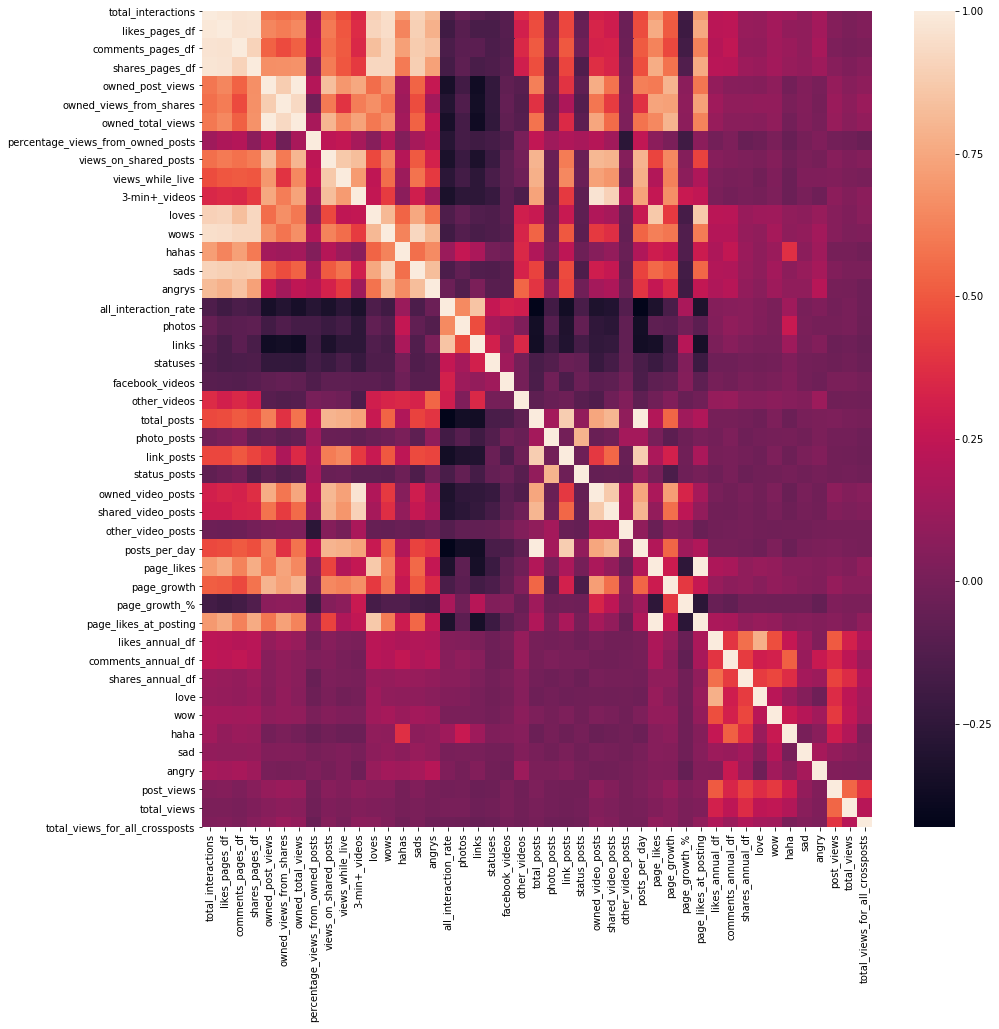

In [347]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr())

In [348]:
df.corr()

,total_interactions,likes_pages_df,comments_pages_df,shares_pages_df,owned_post_views,owned_views_from_shares,owned_total_views,percentage_views_from_owned_posts,views_on_shared_posts,views_while_live,3-min+_videos,loves,wows,hahas,sads,angrys,all_interaction_rate,photos,links,statuses,facebook_videos,other_videos,total_posts,photo_posts,link_posts,status_posts,owned_video_posts,shared_video_posts,other_video_posts,posts_per_day,page_likes,page_growth,page_growth_%,page_likes_at_posting,likes_annual_df,comments_annual_df,shares_annual_df,love,wow,haha,sad,angry,post_views,total_views,total_views_for_all_crossposts
total_interactions,1.000000,0.988646,0.970087,0.973191,0.590406,0.564453,0.596182,0.139598,0.564921,0.468290,0.342074,0.902004,0.953656,0.717535,0.908459,0.818818,-0.137719,-0.054647,-0.102901,-0.133092,-0.102876,0.357791,0.455158,-0.013310,0.450296,-0.076552,0.312253,0.291665,-0.032141,0.455155,0.707593,0.517589,-0.173502,0.701161,0.229760,0.244770,0.122469,0.107998,0.154249,0.143029,0.093104,0.157458,0.043136,0.021370,0.033363
likes_pages_df,0.988646,1.000000,0.964565,0.967261,0.639125,0.603720,0.643842,0.180147,0.600967,0.494569,0.361452,0.913497,0.949662,0.631406,0.896002,0.784027,-0.184488,-0.101120,-0.152012,-0.152811,-0.108791,0.312223,0.466099,0.006697,0.450271,-0.050195,0.329719,0.293377,-0.033856,0.466094,0.759897,0.506289,-0.195958,0.754389,0.224912,0.234436,0.109442,0.104667,0.149222,0.094950,0.088073,0.148891,0.045678,0.021511,0.038672
comments_pages_df,0.970087,0.964565,1.000000,0.905056,0.528239,0.458628,0.523657,0.205583,0.573750,0.505911,0.350153,0.834616,0.923525,0.726216,0.878315,0.848442,-0.145714,-0.094900,-0.089549,-0.144507,-0.115992,0.347685,0.505539,0.038758,0.502096,-0.013447,0.320459,0.325764,-0.031203,0.505534,0.626857,0.458061,-0.176000,0.621513,0.212236,0.248056,0.099138,0.090619,0.141353,0.121698,0.085597,0.162872,0.027812,0.011008,0.017768
shares_pages_df,0.973191,0.967261,0.905056,1.000000,0.665454,0.675311,0.680184,0.067569,0.606348,0.492059,0.410580,0.925975,0.927051,0.600221,0.889713,0.729382,-0.172113,-0.081870,-0.154528,-0.135923,-0.100010,0.307196,0.471050,-0.067757,0.446429,-0.130325,0.372098,0.335171,-0.002900,0.471047,0.767533,0.578675,-0.126574,0.760306,0.222245,0.213931,0.128218,0.112736,0.146327,0.111674,0.089501,0.133078,0.056776,0.031444,0.052968
owned_post_views,0.590406,0.639125,0.528239,0.665454,1.000000,0.887037,0.995281,0.206109,0.837957,0.693969,0.749544,0.559871,0.671047,0.149832,0.533864,0.263950,-0.339913,-0.179637,-0.366840,-0.238254,-0.077848,-0.104251,0.617037,-0.049071,0.388334,-0.075264,0.768619,0.579440,0.021175,0.617035,0.603069,0.797747,0.071992,0.590145,0.099513,0.059193,0.055088,0.049944,0.082269,-0.010600,0.034809,0.008026,0.106135,0.061250,0.082155
owned_views_from_shares,0.564453,0.603720,0.458628,0.675311,0.887037,1.000000,0.927651,-0.019428,0.601590,0.389661,0.609705,0.666931,0.582257,0.129920,0.467269,0.145346,-0.292254,-0.130536,-0.354714,-0.235075,-0.059654,-0.117402,0.384944,-0.081752,0.183931,-0.115111,0.587452,0.417556,0.032208,0.384939,0.742900,0.729309,0.082670,0.731779,0.136032,0.087111,0.086857,0.090029,0.091594,0.013941,0.042785,0.000132,0.120812,0.076690,0.120318
owned_total_views,0.596182,0.643842,0.523657,0.680184,0.995281,0.927651,1.000000,0.162630,0.804221,0.643215,0.734413,0.593021,0.665151,0.148498,0.530023,0.244044,-0.336363,-0.172735,-0.371270,-0.242118,-0.075505,-0.108998,0.579997,-0.056873,0.352763,-0.085070,0.745165,0.556440,0.023896,0.579994,0.643928,0.798539,0.075606,0.631137,0.109081,0.066187,0.062813,0.059318,0.085794,-0.005644,0.037148,0.006520,0.111238,0.065660,0.091738
percentage_views_from_owned_posts,0.139598,0.180147,0.205583,0.067569,0.206109,-0.019428,0.162630,1.000000,0.237477,0.253797,0.157983,0.056334,0.200954,0.039503,0.158322,0.209933,-0.282848,-0.167994,-0.194474,-0.170676,-0.129223,0.010099,0.246701,0.130372,0.186799,0.162776,0.210783,0.142460,-0.265682,0.246702,0.067395,0.015676,-0.189308,0.068214,-0.0060